# <font color='darkblue'> THE NETWORK OF BEATLES' SONGS

## <font color='darkblue'>Analysis of the network of Beatles'Songs: Getting into their mind

In [4]:
#We import all the necessary packages we used for this project

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import ast
import operator
import powerlaw
from fa2 import ForceAtlas2
import re
from urllib.request import urlopen
import urllib.request as urllib2
import os
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import community.community_louvain
import matplotlib.cm as cm

In [5]:
from nltk.corpus import PlaintextCorpusReader
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import FreqDist
from nltk.text import TextCollection
from matplotlib import cm
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [4]:
#Import data

Song_data=pd.read_csv('Songs_Sorted_Years.csv')
Song_data

Song  Year     Month  Day Lyrics
0                      love-me-do  1962   October    5    Yes
1                   ps-i-love-you  1962   October    5    Yes
2                      ask-me-why  1963   January   11    Yes
3                please-please-me  1963   January   11     No
4                     taste-honey  1963     March   22     No
..                            ...   ...       ...  ...    ...
296              you-know-what-do  2012  December   14    Yes
297  you-never-give-me-your-money  2012  December   14    Yes
298                sie-liebt-dich  2013  February    7    Yes
299                     slow-down  2013  February    7     No
300               you-me-too-much  2013       May   16    Yes

[301 rows x 5 columns]

###  <font color='darkblue'>Part 1: Clean Lyrics of Songs.

In [11]:
stop_words = list(set(stopwords.words('english')))
stop_words = [el.replace('\'','') for el in stop_words]
stop_words.append('im')

<font color='darkblue'> A function to **clean the lyrics** is built.

In [12]:
def clean_lyrics(file_path):
    data=open(file_path).read()
    # import WordPunctTokenizer() method from nltk
    # Create a reference variable for Class WordPunctTokenizer
    tk = WordPunctTokenizer()
    # define punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    # remove punctuation from the string
    no_punct = ""
    for char in data:
        if char not in punctuations:
            no_punct = no_punct + char
    # Remove all the special characters as \n and single = left
    char=['\n','=']
    for el in char:
        raw=re.sub(el,'',no_punct)
    # remove stop words
    token_txt = tk.tokenize(raw.lower()) # set to lower case
    token_txt = tk.tokenize(raw.lower()) # set to lower case
    token_final = [x for x in token_txt if x not in stop_words and len(x)>2]
    return token_final

In [13]:
lyrics_files=[el[:-4] for el in os.listdir('lyrics_songs')]
lyrics_files.remove('.DS_S') # remove this element that is introduced when using os.listdir

In [14]:
file_list = os.listdir("lyrics_songs")
file_list.remove('.DS_Store')

for file in lyrics_files:
    path='lyrics_songs/'+file+'.txt'
    clean=clean_lyrics(path)
    file=open('clean_lyrics/'+file+'.txt','w+')
    for word in clean:
        file.write(word+' ')
    file.close()

In [15]:
corpus = PlaintextCorpusReader('clean_lyrics',file_list)
corpus

<PlaintextCorpusReader in '/Users/lluiscolomercoll/Documents/GitHub/SocialGraphs-Project/clean_lyrics'>

###  <font color='darkblue'>Part 2: Build the Network.

In [16]:
def tc(corpus):
    """ Calculates the term count for each word in each race """
    tc_dict = {}
    for race in corpus.fileids():
        text = nltk.Text(corpus.words(race))
        tc_dict[race[:-4]] = dict(FreqDist(text))
    return tc_dict

def idf(corpus):
    """ Calculates the IDF for each word in the corpus"""
    text = TextCollection(corpus)
    idf_dict = {}
    for word in set(corpus.words()):
        idf_dict[word] = text.idf(word)
    return idf_dict

def tc_idf(corpus):
    """ Calculates the TC-IDF for each word per race in the corpus, and returns it as a dictionary """
    tc_dict = tc(corpus)
    idf_dict = idf(corpus)
    tc_idf_dict = {}
    races = list(tc_dict.keys())
    for race in races:
        tc_idf_dict[race] = {}
        for key, value in tc_dict[race].items():
            tc_idf_dict[race][key] = value * idf_dict[key]
    return tc_idf_dict

We save the tc-idf values of the corpus as a dict, and we order each song from the lower to the higher tc-idf value

In [17]:
tc_idf_dict=tc_idf(corpus)
for el in tc_idf_dict:
    tc_idf_dict[el]=sorted(tc_idf_dict[el].items(), key=lambda item: item[1])

We save the top 5 words for each song according to the tc-idf score

In [18]:
tc_idf_top5={}
for el in tc_idf_dict:
    tc_idf_top5[el]=[word[0] for word in tc_idf_dict[el][-2:]]

Now let's create a dictionary to store the links

In [19]:
lyrics_files

['yesterday',
 'youve-got-hide-your-love-away',
 'got-get-you-my-life',
 'i-need-you',
 'one-after-909',
 'us-you',
 'if-i-fell',
 'it-wont-be-long',
 'youre-going-lose-girl',
 'you-know-what-do',
 'eight-days-week',
 'me-you',
 'everybodys-got-something-hide-except-me-and-my-monkey',
 'because',
 'her-majesty',
 'maggie-mae',
 'piggies',
 'im-only-sleeping',
 'get-back',
 'komm-gib-mir-deine-hand',
 'im-loser',
 'what-goes',
 'fixing-hole',
 'when-i-get-home',
 'here-there-and-everywhere',
 'im-down',
 'every-little-thing',
 'youll-be-mine',
 'come-together',
 'martha-my-dear',
 'ill-cry-instead',
 'ill-follow-sun',
 'ticket-ride',
 'only-northern-song',
 'all-ive-got-do',
 'any-time-all',
 'shes-leaving-home',
 'strawberry-fields-forever',
 'im-so-tired',
 'think-yourself',
 'dont-let-me-down',
 'baby-youre-rich-man',
 'girl',
 'i-call-your-name',
 'i-want-tell-you',
 'free-bird',
 'octopuss-garden',
 'what-youre-doing',
 'i-want-hold-your-hand',
 'end',
 'she-came-through-bathroom-w

In [20]:
def create_hyperlinks(lyrics_files,tc_idf_top5):
    hyperlinks={} #dictionary to store links 

    for file1 in lyrics_files:
        eq_files=[]
        for file2 in lyrics_files:
            if file1!=file2:
                a=tc_idf_top5[file1]
                b=tc_idf_top5[file2]
                # compute if there are equal words in both lists
                eq=0

                for el in a:
                    if el in b:
                        eq+=1
                if eq!=0:
                    eq_files.append(file2)

        idx1=Song_data[Song_data['Song']==file1].index[0]

        eq_files_later=[]

        for eq in eq_files:
            idx2=Song_data[Song_data['Song']==eq].index[0]
            if idx1<idx2: # means that file1 song was released earlier
                eq_files_later.append(eq)

        hyperlinks[file1]=eq_files_later
    return hyperlinks

<font color='darkblue'> With the links stored, we are able to build the directed Graph based on the date release of the corresponding songs. 

In [21]:
def build_network(lyrics_files,hyperlinks):
    #We build the Directed Network
    Beatles_nw= nx.DiGraph()
    for file in lyrics_files:
        #We add the nodes and attributes to the the network
        file=file.replace('-',' ')
        Beatles_nw.add_node(file)

    #We add the hyperlinks to the the network
    for el in lyrics_files:
        links= hyperlinks[el]
        for a in links:
            u= el
            v= a
            u=u.replace('-',' ')
            v=v.replace('-',' ')
            Beatles_nw.add_edge(u,v)
    return Beatles_nw

<font color='darkblue'> Next, we extract the **GCC** subgraph of the Beatles network.

In [22]:
def extract_GCC(Beatles_nw):
    Gs = list(Beatles_nw.subgraph(c).copy() for c in nx.weakly_connected_components(Beatles_nw))
    biggest = 0
    GCC_index = 0
    for index,graph in enumerate(Gs):
        if len(graph.nodes) > biggest:
            biggest = len(graph.nodes)
            GCC_index = index
    GCC = Gs[GCC_index]
    print('- Considering the GCC of the Beatles Network, it has',len(GCC.nodes()),'number of nodes and',
      len(GCC.edges.data()),'number of links.')
    return GCC

To determine the criteria of how many words should be chosen according to the tc-idf score when establishing the links between nodes, we will prioratize the threshold that gives us higher modularity when finding communities in our songs

Threshold:  2
- Considering the GCC of the Beatles Network, it has 9 number of nodes and 14 number of links.
Number of communities found:  2
The modularity value is: 0.263
The distribution of the community sizes


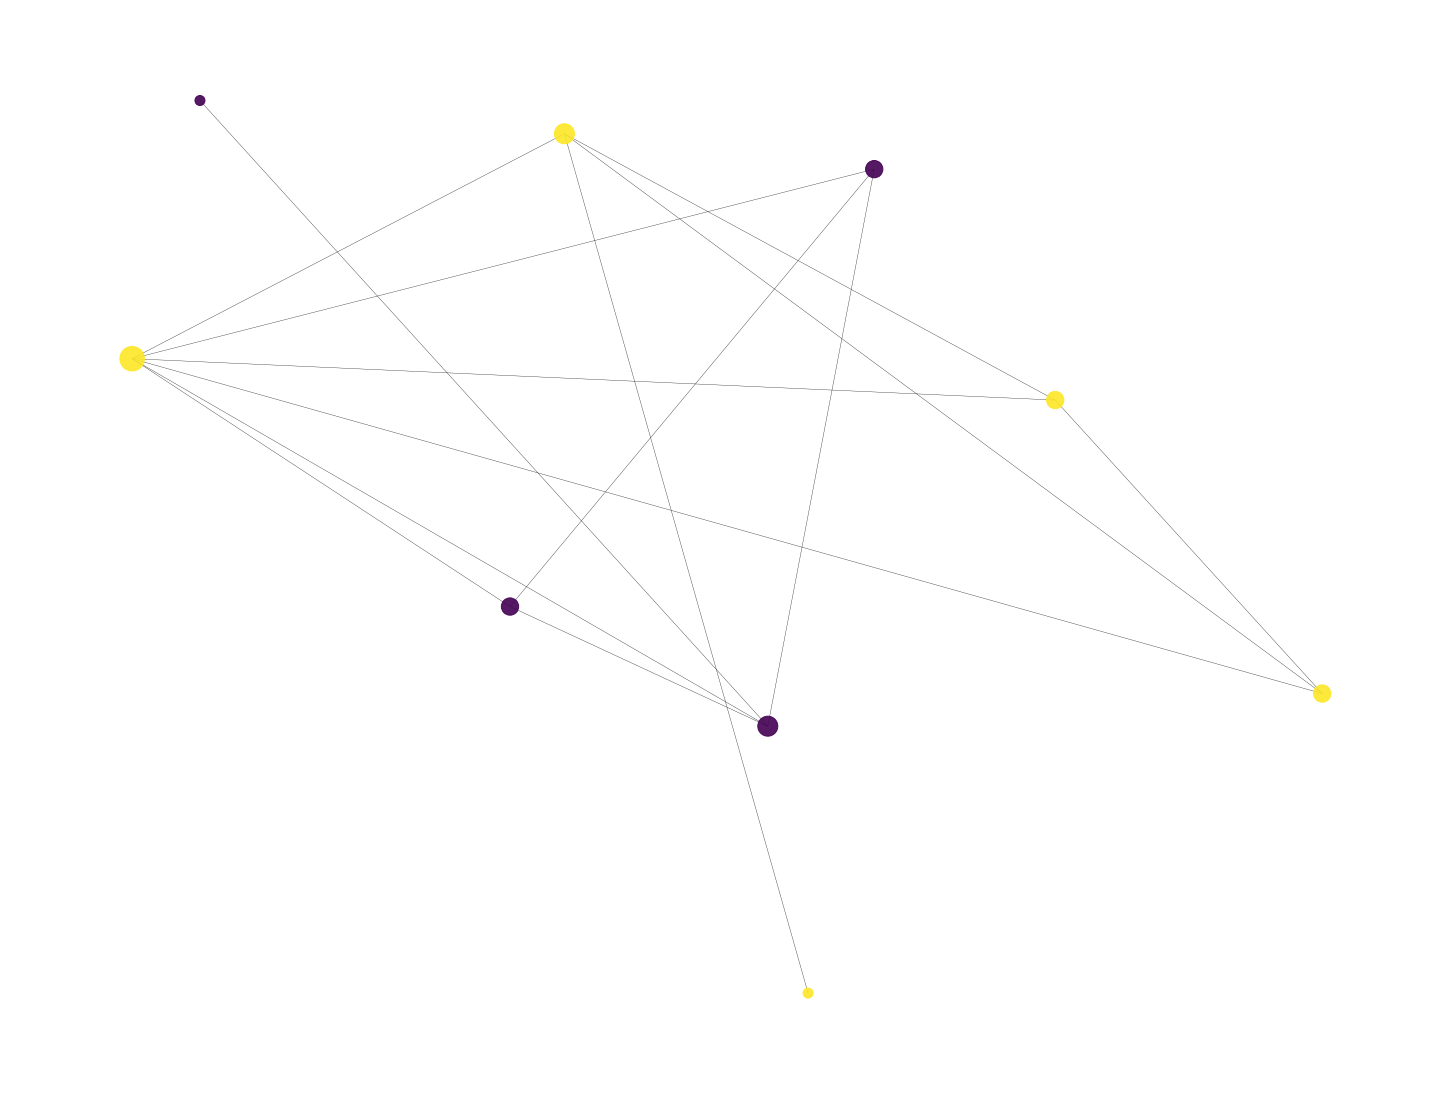

Threshold:  3
- Considering the GCC of the Beatles Network, it has 70 number of nodes and 117 number of links.
Number of communities found:  8
The modularity value is: 0.723
The distribution of the community sizes


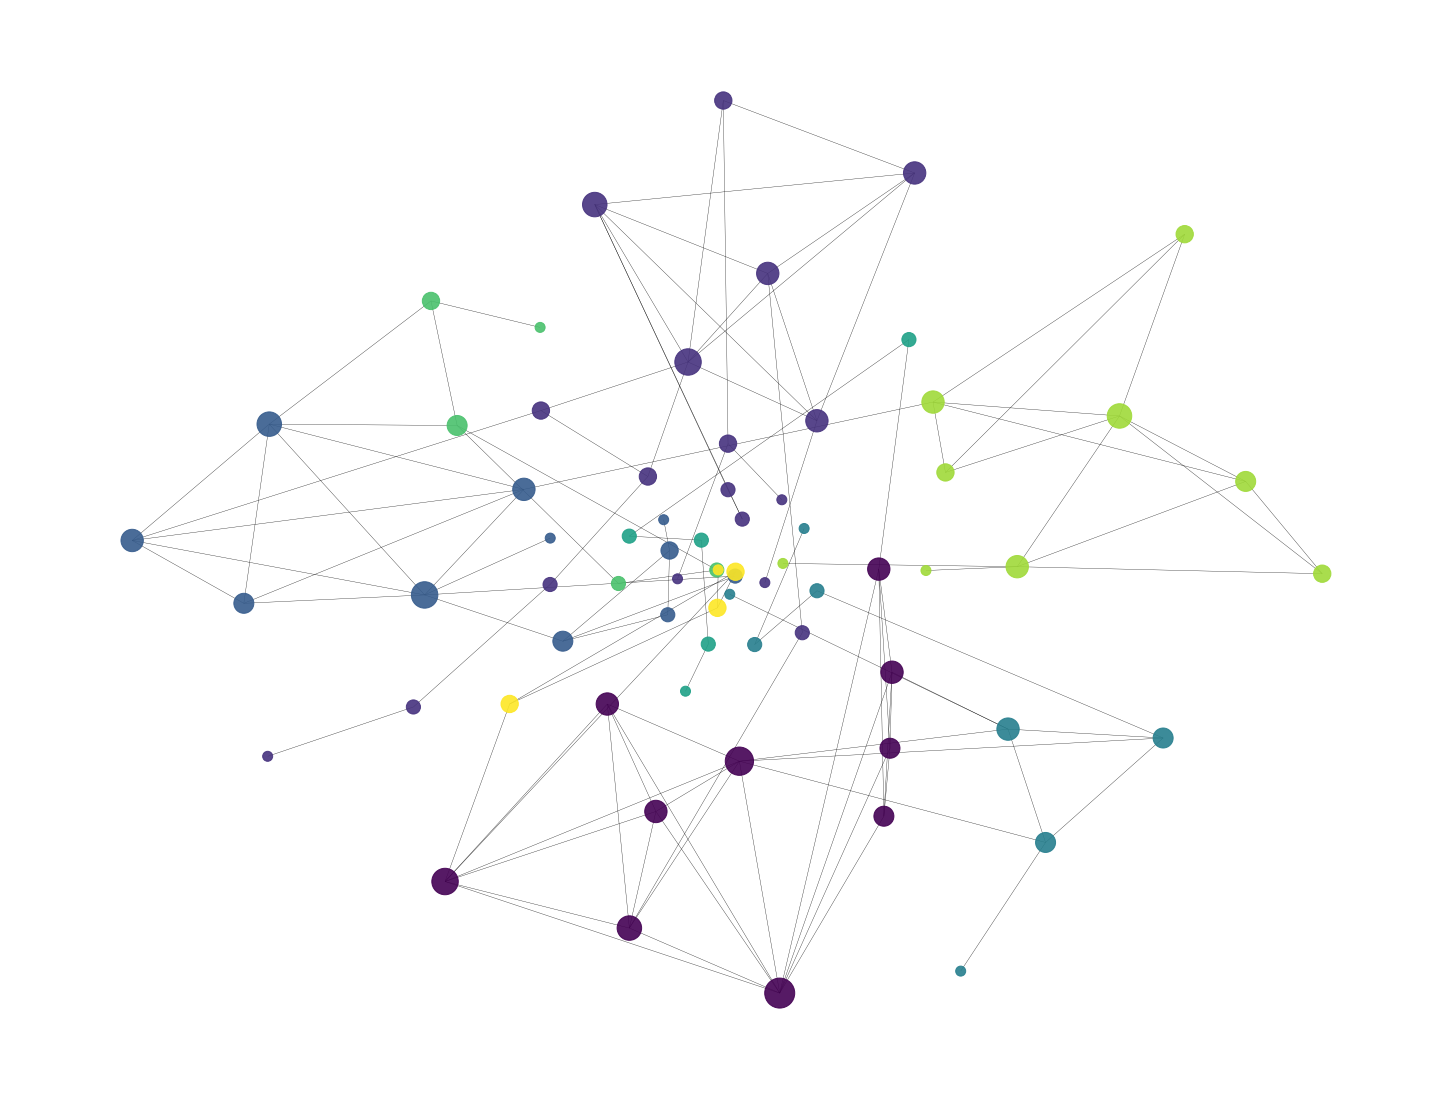

Threshold:  4
- Considering the GCC of the Beatles Network, it has 132 number of nodes and 296 number of links.
Number of communities found:  11
The modularity value is: 0.701
The distribution of the community sizes


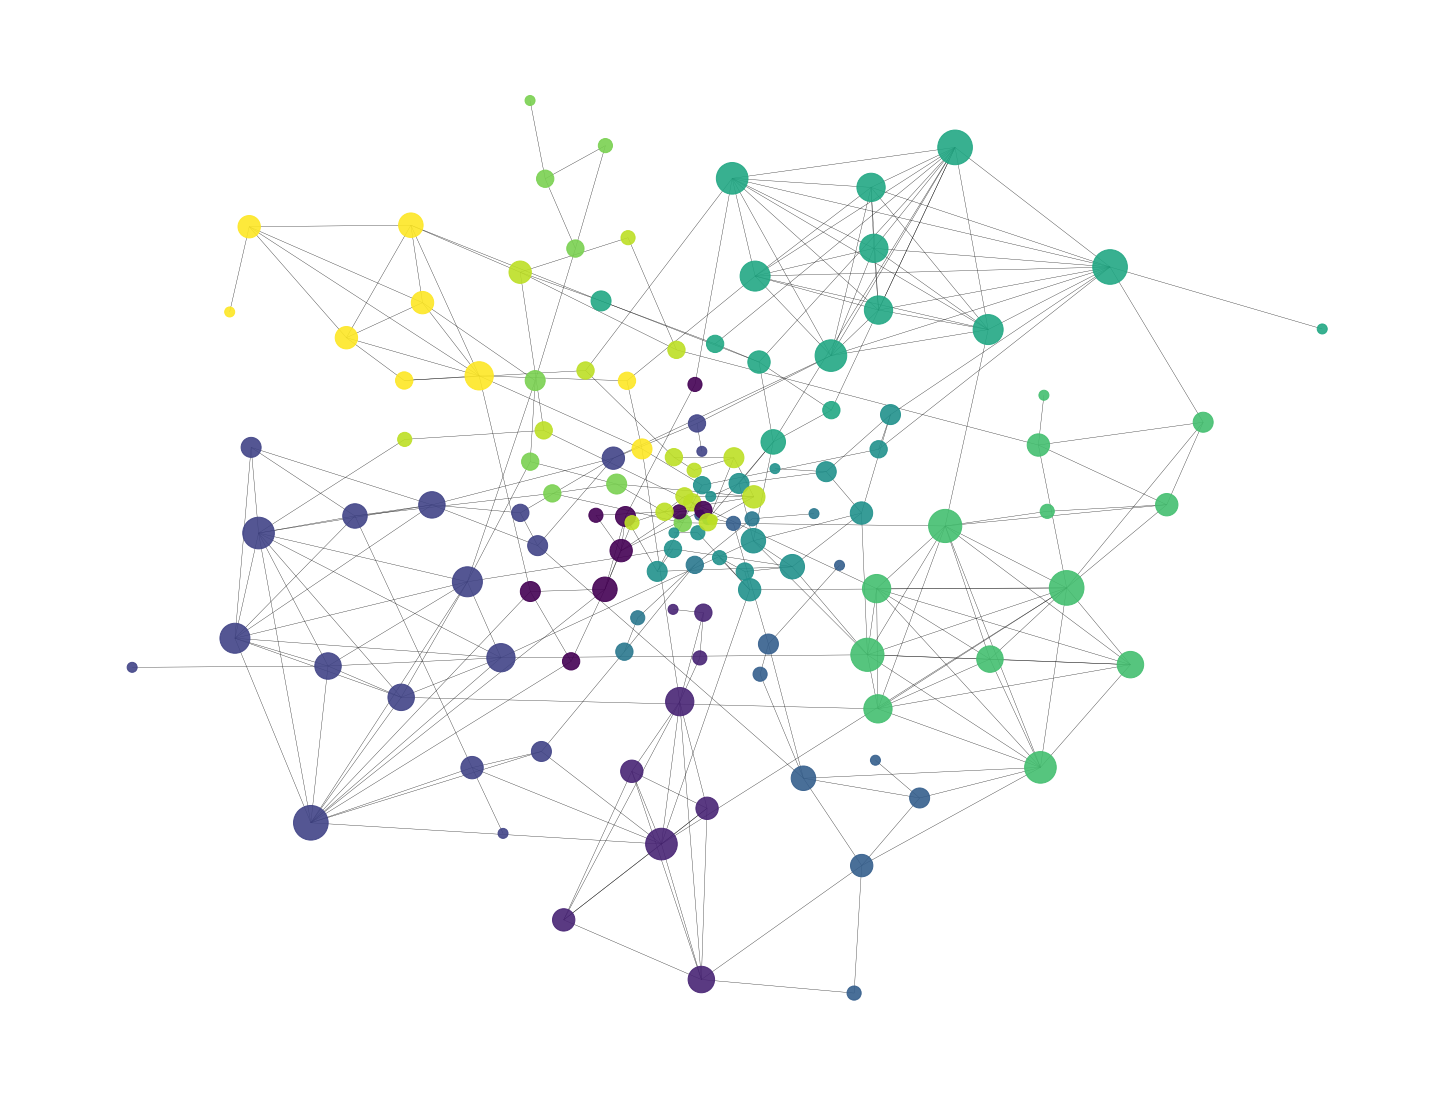

Threshold:  5
- Considering the GCC of the Beatles Network, it has 174 number of nodes and 482 number of links.
Number of communities found:  10
The modularity value is: 0.591
The distribution of the community sizes


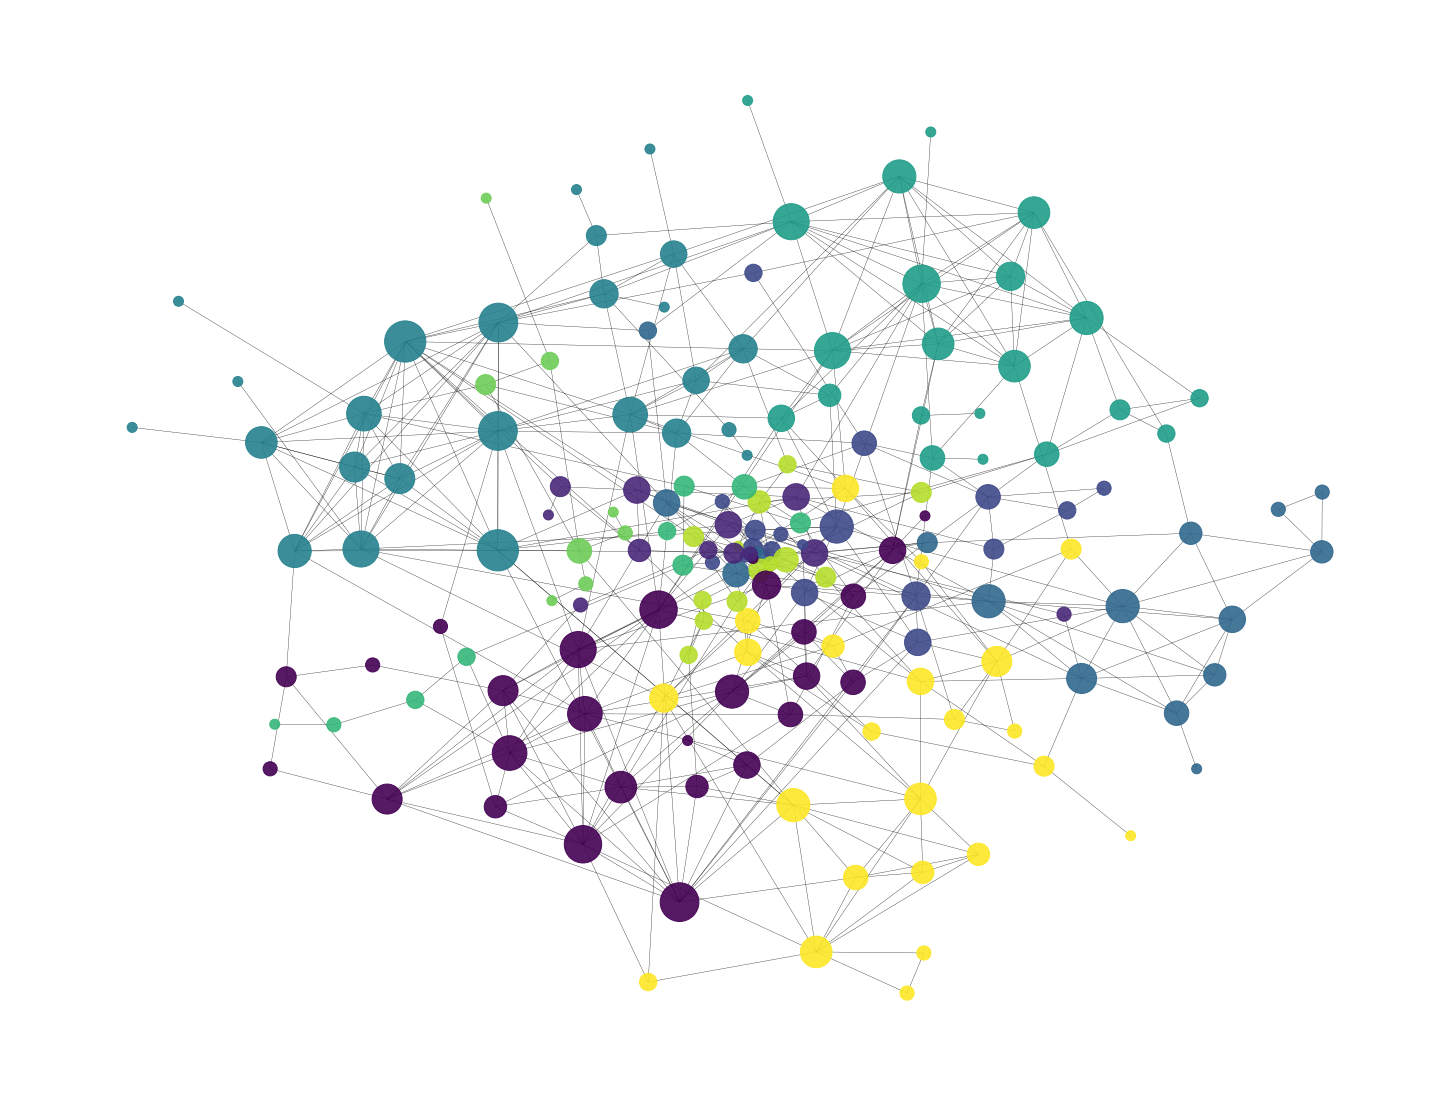

Threshold:  6
- Considering the GCC of the Beatles Network, it has 184 number of nodes and 695 number of links.
Number of communities found:  10
The modularity value is: 0.510
The distribution of the community sizes


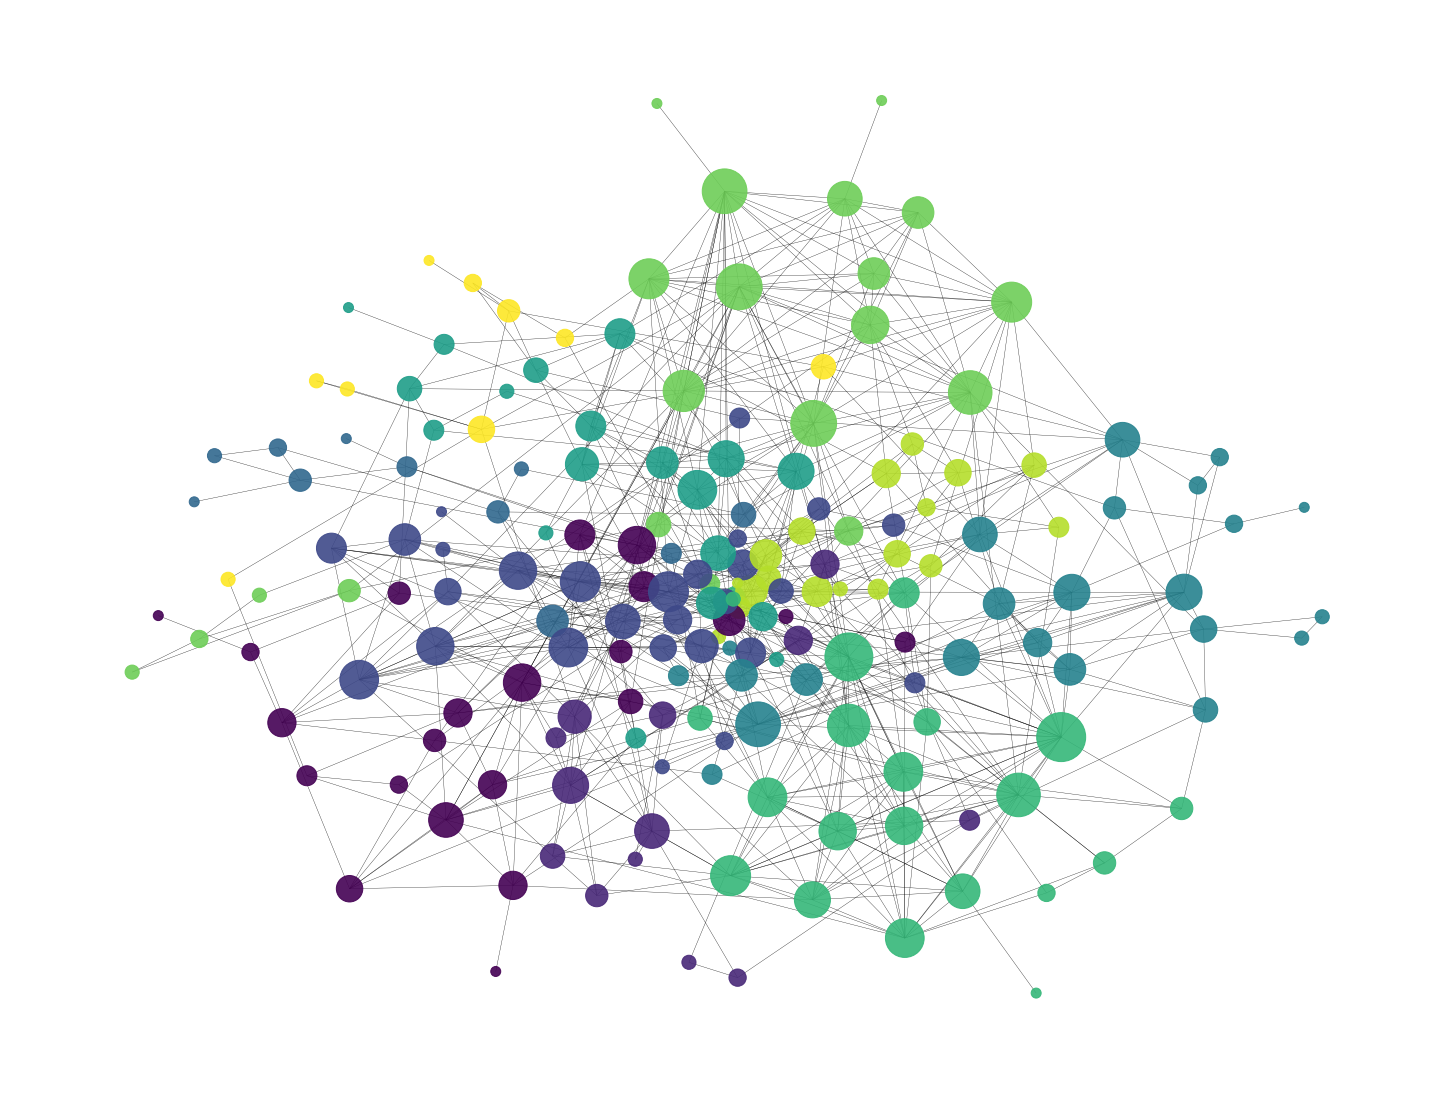

Threshold:  7
- Considering the GCC of the Beatles Network, it has 189 number of nodes and 953 number of links.
Number of communities found:  10
The modularity value is: 0.441
The distribution of the community sizes


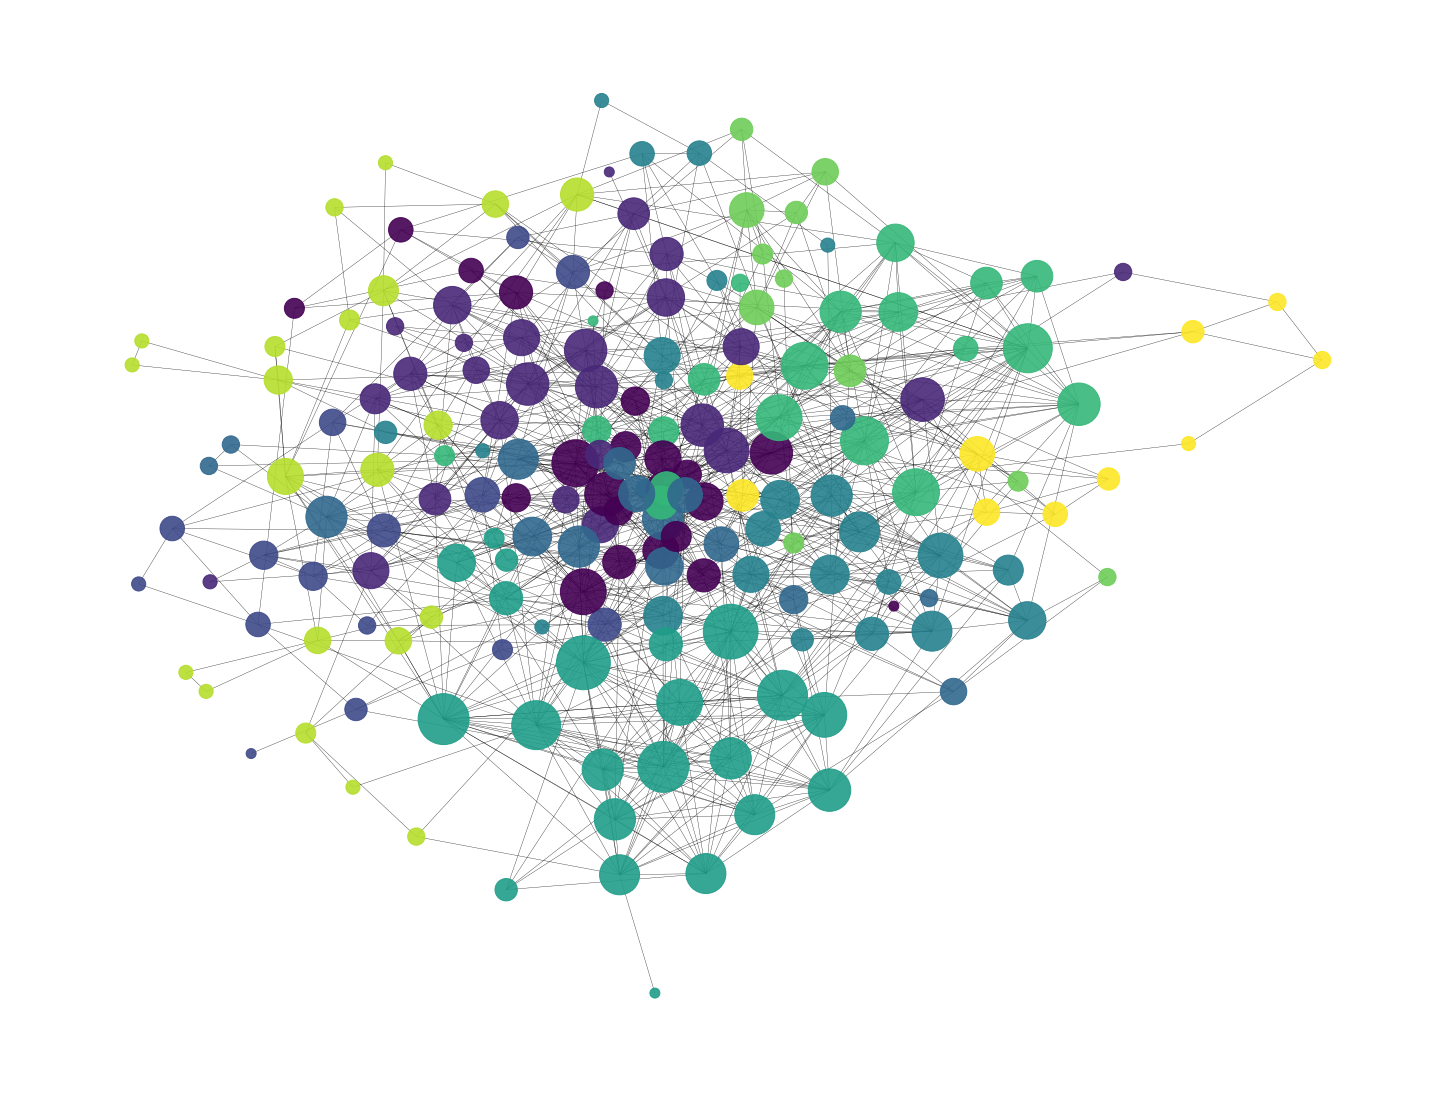

Threshold:  8
- Considering the GCC of the Beatles Network, it has 193 number of nodes and 1248 number of links.
Number of communities found:  9
The modularity value is: 0.367
The distribution of the community sizes


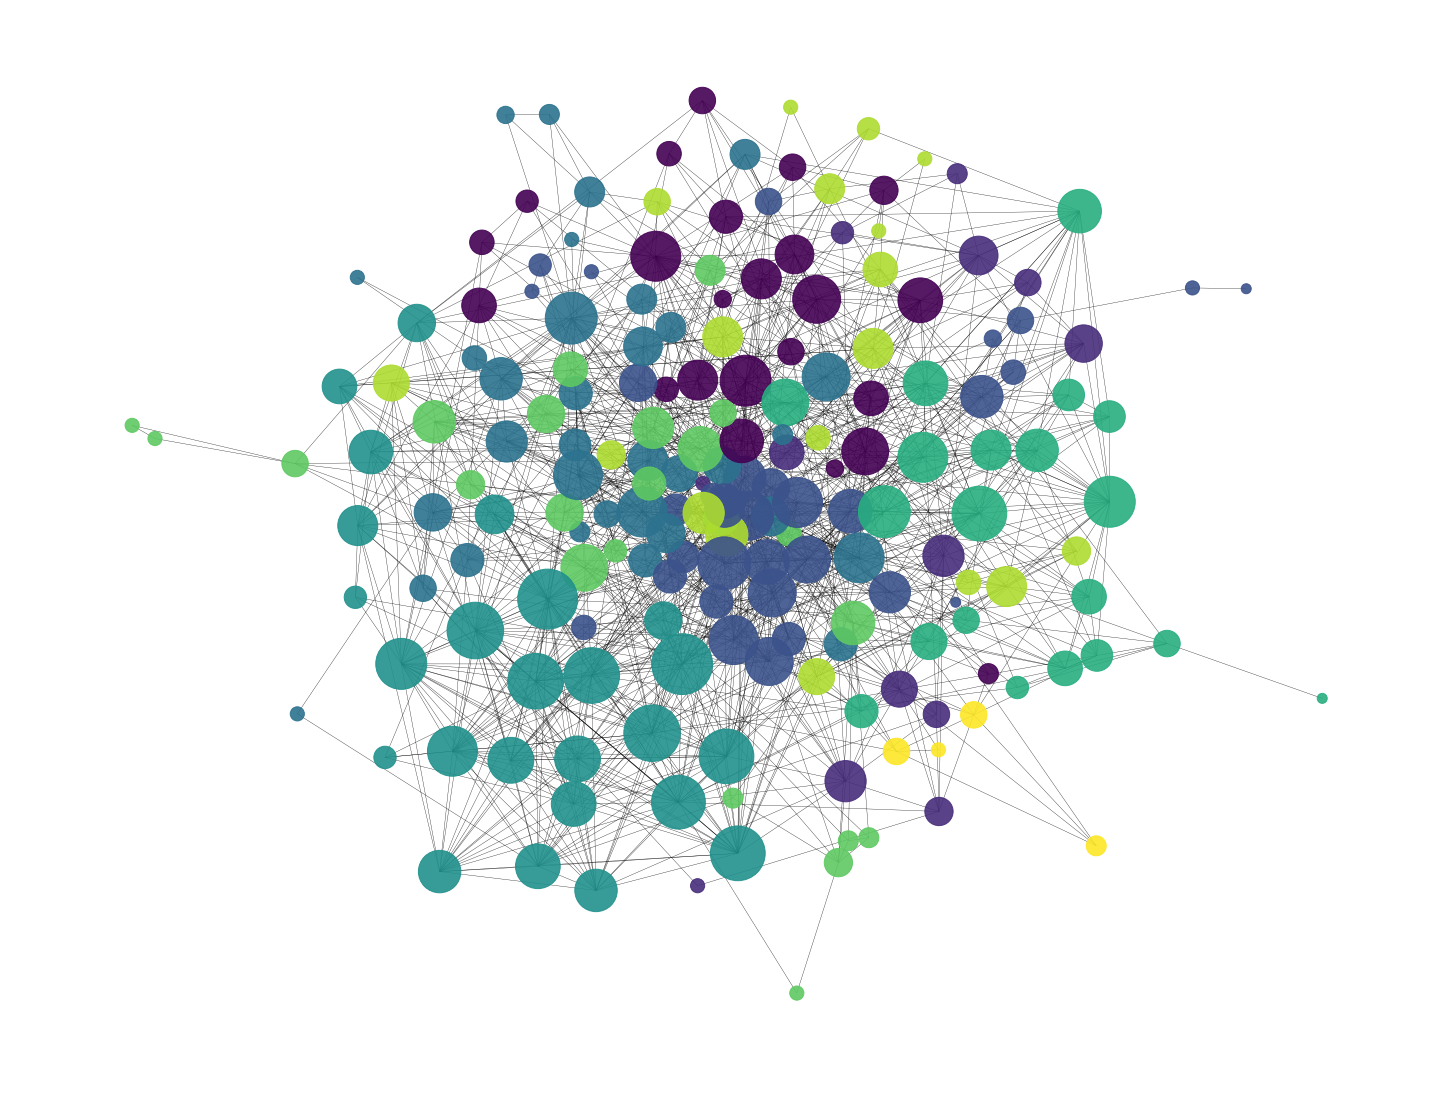

Threshold:  9
- Considering the GCC of the Beatles Network, it has 195 number of nodes and 1528 number of links.
Number of communities found:  8
The modularity value is: 0.319
The distribution of the community sizes


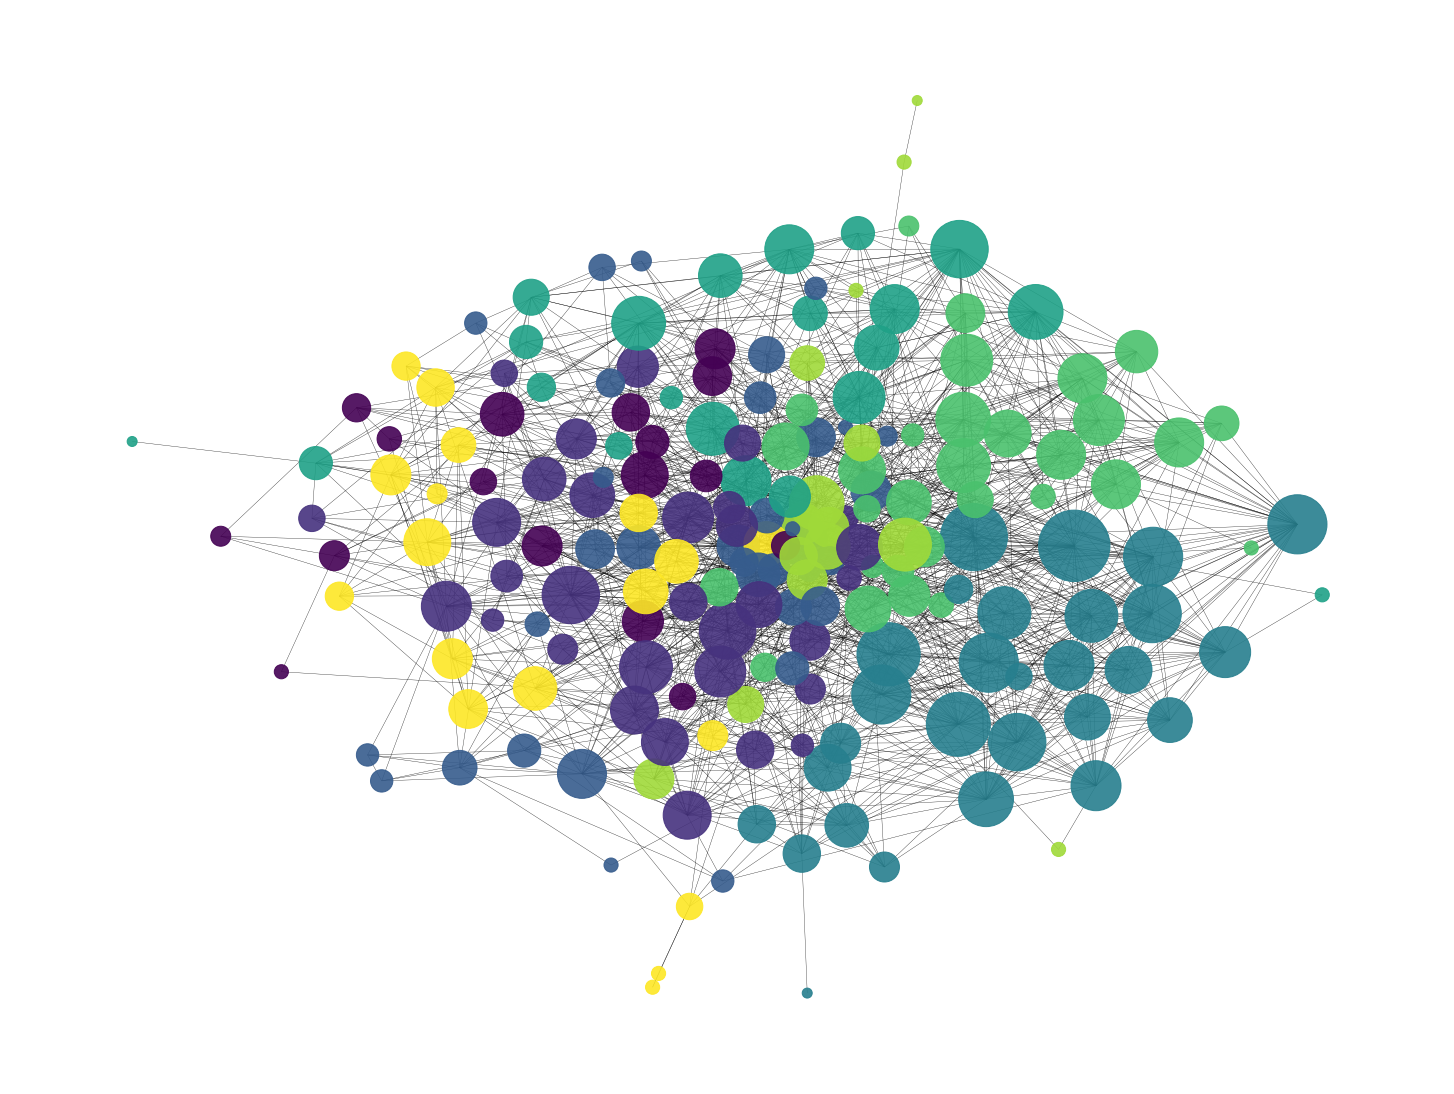

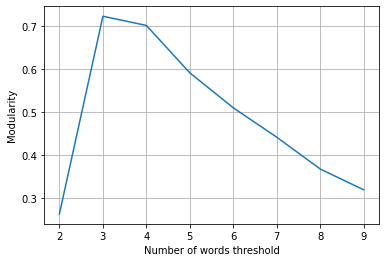

In [25]:
modularities=[]
for i in range(2,10):
    print('Threshold: ',i)
    tc_idf_top={}
    for el in tc_idf_dict:
        tc_idf_top[el]=[word[0] for word in tc_idf_dict[el][-i:]]
    hyperlinks=create_hyperlinks(lyrics_files,tc_idf_top)
    nw=build_network(lyrics_files,hyperlinks)
    GCC=extract_GCC(nw)
    # Compute the best partition. We need to take into account the undirected graph. 
    un_Beatles_nw= GCC.to_undirected()
    partition = community.community_louvain.best_partition(un_Beatles_nw)
    print('Number of communities found: ', len(np.unique(list(partition.values()))))
    mod = community.community_louvain.modularity(partition, un_Beatles_nw)
    print("The modularity value is:","{:.3f}".format(mod))
    modularities.append(mod)
    node_community = [node[1] for node in partition.items()]
    pCol = {i: list(np.random.random(size=3)) for i in set(node_community)}
    plt.figure(figsize=(20, 10))
    forceatlas2 = ForceAtlas2(
                            # Behavior alternatives
                            outboundAttractionDistribution=False,  # Dissuade hubs
                            linLogMode=False,  # NOT IMPLEMENTED
                            adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                            edgeWeightInfluence=2.0,

                            # Performance
                            jitterTolerance=1.0,  # Tolerance
                            barnesHutOptimize=True,
                            barnesHutTheta=1.2,
                            multiThreaded=False,  # NOT IMPLEMENTED

                            # Tuning
                            scalingRatio=0.1,
                            strongGravityMode=False,
                            gravity=10.0,

                            # Log
                            verbose=False)

    positions = forceatlas2.forceatlas2_networkx_layout(un_Beatles_nw, pos=None, iterations=2000)
    f = dict(nx.degree(un_Beatles_nw))
    node_sizes = [v*100 for v in f.values()]
    print("The distribution of the community sizes")
    cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
    fig = plt.gcf()
    nx.draw(un_Beatles_nw, positions, node_size=node_sizes, with_labels=False, width = 0.35, node_color=list(partition.values()), alpha=0.9)
    fig.set_size_inches(20, 15)
    plt.show()
        
plt.plot(list(range(2,10)),modularities)
plt.xlabel('Number of words threshold')
plt.ylabel('Modularity')
plt.grid()

Let's consider we put the threshold at 5

In [26]:
tc_idf_top={}
for el in tc_idf_dict:
    tc_idf_top[el]=[word[0] for word in tc_idf_dict[el][-5:]]
hyperlinks=create_hyperlinks(lyrics_files,tc_idf_top)
nw=build_network(lyrics_files,hyperlinks)
GCC=extract_GCC(nw)
# Compute the best partition. We need to take into account the undirected graph. 
un_Beatles_nw= GCC.to_undirected()

- Considering the GCC of the Beatles Network, it has 174 number of nodes and 482 number of links.


####  <font color='darkblue'>Part 3.2: Statistical Analysis of the Network: In-degree and Out-degree Distributions. 

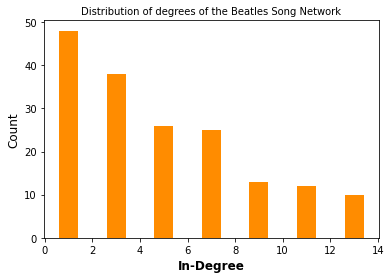

In [27]:
#Bar plot of the in-degree distribution
degrees = sorted(GCC.degree(GCC.nodes, weight=None), key=lambda x: x[1], reverse = True)
degrees_dist = [tuples[1] for tuples in degrees]
v1 = np.arange(int(min(degrees_dist )),int(max(degrees_dist)),2)

fig1 = plt.gcf()
count1,bins1=np.histogram(degrees_dist ,bins=v1)
plt.bar(bins1[:-1], count1,color='darkorange')
plt.title('Distribution of degrees of the Beatles Song Network',fontsize=10)
plt.xlabel('In-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12)
#plt.savefig("In_degree.png")
plt.show()

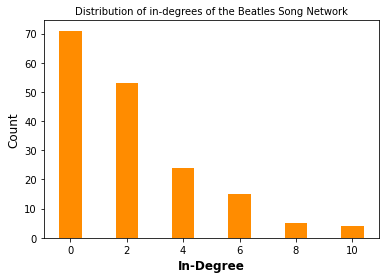

In [28]:
#Bar plot of the in-degree distribution
in_degrees = sorted(GCC.in_degree(GCC.nodes, weight=None), key=lambda x: x[1], reverse = True)
in_degrees_dist = [tuples[1] for tuples in in_degrees]
v1 = np.arange(int(min(in_degrees_dist )),int(max(in_degrees_dist)),2)

fig1 = plt.gcf()
count1,bins1=np.histogram(in_degrees_dist ,bins=v1)
plt.bar(bins1[:-1], count1,color='darkorange')
plt.title('Distribution of in-degrees of the Beatles Song Network',fontsize=10)
plt.xlabel('In-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Count',fontsize=12)
#plt.savefig("In_degree.png")
plt.show()

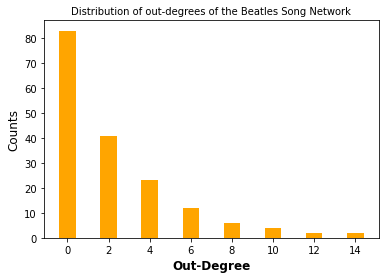

In [29]:
#Bar plot of the out-degree distribution
out_degrees = sorted(GCC.out_degree(GCC.nodes, weight=None), key=lambda x: x[1], reverse = True)
out_degrees_dist = [tuples[1] for tuples in out_degrees]

fig2 = plt.gcf()
v2 = np.arange(int(min(out_degrees_dist)),int(max(out_degrees_dist)),2)
count2,bins2=np.histogram(out_degrees_dist,bins=v2)
plt.bar(bins2[:-1], count2,color='orange')
plt.title('Distribution of out-degrees of the Beatles Song Network',fontsize=10)
plt.xlabel('Out-Degree',fontsize=12,fontweight='bold')
plt.ylabel('Counts',fontsize=12)
#plt.savefig("Out_degree.png")
plt.show()

###  <font color='darkblue'>Part 4: Find Communities

##  <font color='darkblue'> Sentimental analysis of communities

In [30]:
# Compute the best partition. We need to take into account the undirected graph. 
un_Beatles_nw= GCC.to_undirected()
partition = community.community_louvain.best_partition(un_Beatles_nw)

print('Number of communities found: ', len(np.unique(list(partition.values()))))

Number of communities found:  10


In [31]:
mod = community.community_louvain.modularity(partition, un_Beatles_nw)
print("The modularity value is:","{:.3f}".format(mod))

The modularity value is: 0.597


####  <font color='darkblue'>Visualize Communities:

In [32]:
node_community = [node[1] for node in partition.items()]
pCol = {i: list(np.random.random(size=3)) for i in set(node_community)}


The distribution of the community sizes


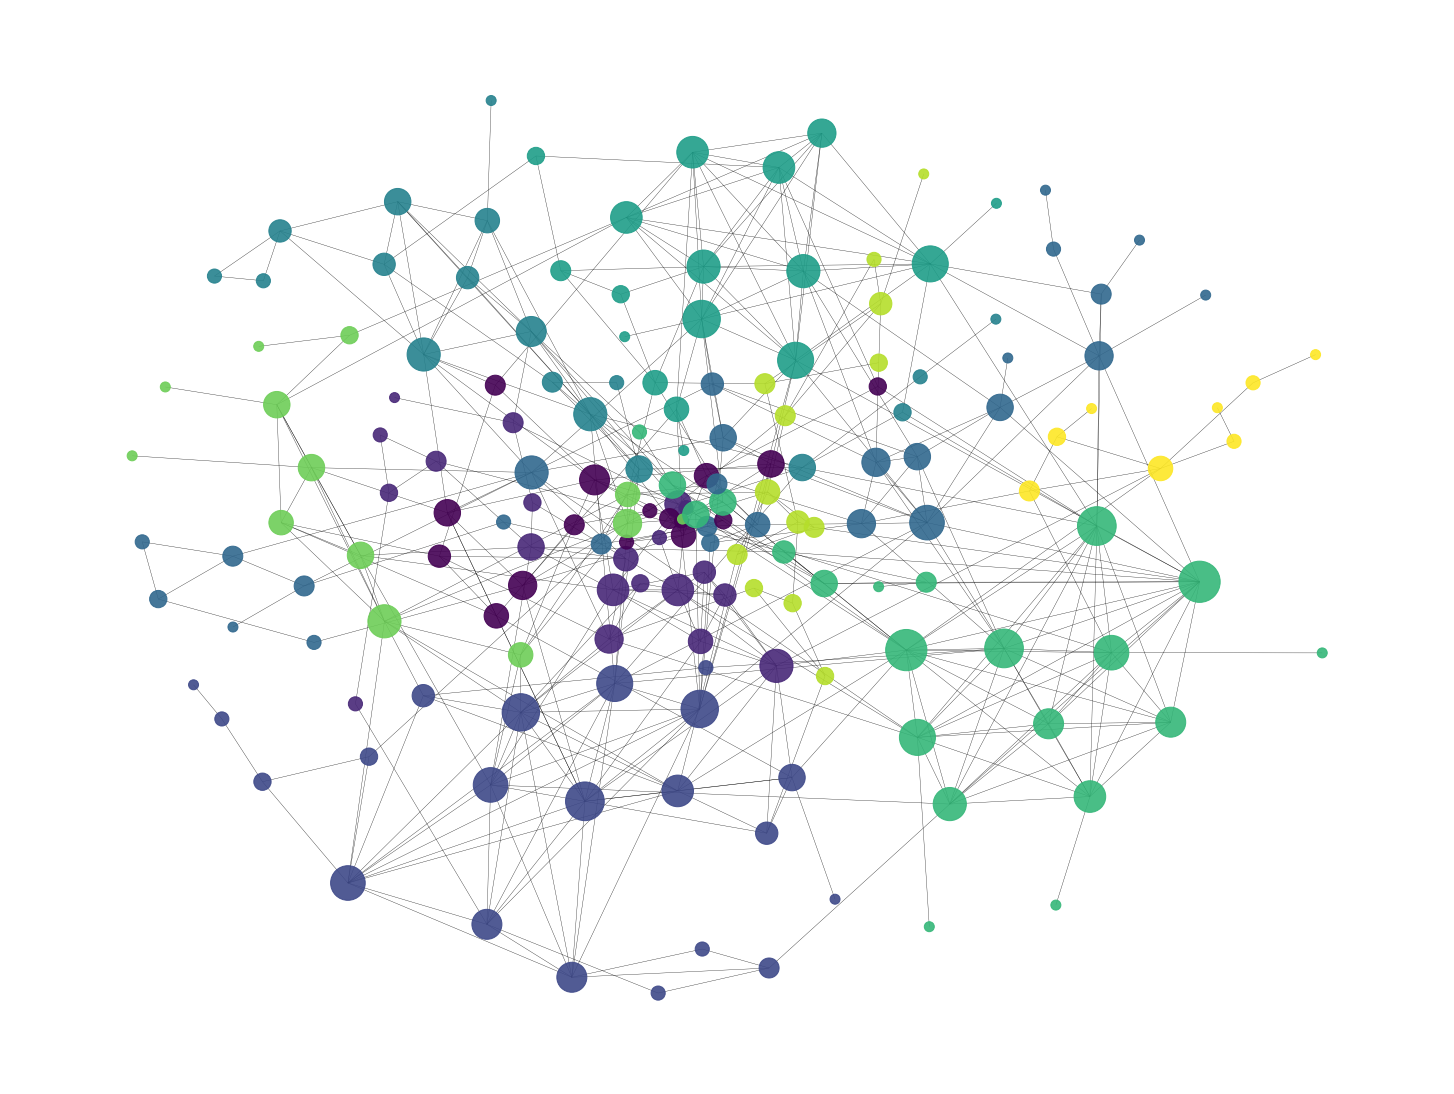

In [33]:
plt.figure(figsize=(30, 15))
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=2.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=0.1,
                        strongGravityMode=False,
                        gravity=10.0,

                        # Log
                        verbose=False)

positions = forceatlas2.forceatlas2_networkx_layout(un_Beatles_nw, pos=None, iterations=2000)
f = dict(nx.degree(un_Beatles_nw))
node_sizes = [v*100 for v in f.values()]
print("The distribution of the community sizes")
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
fig = plt.gcf()
nx.draw(un_Beatles_nw, positions, node_size=node_sizes, with_labels=False, width = 0.35, node_color=list(partition.values()), alpha=0.9)
fig.set_size_inches(20, 15)
#plt.savefig("Communities.png")

Compute the number of songs in every community

In [34]:
# We compute the number of songs in every community
#communities_d stores the group of songs in the same community
communities_d=dict.fromkeys(list(range(0,len(np.unique(list(partition.values()))))))
for i in range(0,len(np.unique(list(partition.values())))):
    l=[]
    for el in partition:
        if partition[el]==i:
            l.append(el)
    communities_d[i]=l
    
size_communities=[len(x) for x in communities_d.values()]

size_communities #number of songs in each community

[16, 20, 21, 27, 18, 17, 21, 13, 13, 8]

Let's name every community for the song with highest degree

In [35]:
un_Beatles_nw.degree('yesterday')

6

In [36]:
communities_named={}
for el in communities_d:
    degrees=[un_Beatles_nw.degree(song) for song in communities_d[el]]
    # pick the maximum degree and rename the community by the max degree name
    communities_named[communities_d[el][degrees.index(max(degrees))]]=communities_d[el]

<font color='darkblue'> Next, we extract the **most common words** in each community. 
    
    
- <font color='darkblue'> First, counting the number of times a word appears in each song of the community. 

In [37]:
for idx in communities_named:
    community_words=[]
    for el in communities_named[idx]:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        for word in clean:
            community_words.append(word)
    print(idx,': ', FreqDist(community_words).most_common(5))

i want hold your hand :  [('know', 40), ('love', 33), ('hold', 30), ('hand', 29), ('sun', 23)]
fixing hole :  [('better', 54), ('let', 51), ('way', 45), ('home', 41), ('hey', 34)]
girl :  [('girl', 94), ('say', 52), ('little', 49), ('hello', 42), ('love', 40)]
any time all :  [('love', 55), ('ill', 47), ('good', 39), ('like', 28), ('true', 28)]
i wanna be your man :  [('baby', 78), ('know', 47), ('said', 40), ('man', 40), ('want', 37)]
love me do :  [('love', 139), ('mine', 43), ('know', 23), ('give', 21), ('forever', 20)]
it wont be long :  [('yeah', 169), ('long', 60), ('know', 39), ('sie', 24), ('love', 23)]
little child :  [('come', 47), ('honey', 32), ('well', 26), ('dance', 25), ('shame', 21)]
boy :  [('back', 39), ('tell', 32), ('goes', 26), ('get', 22), ('heart', 21)]
eleanor rigby :  [('know', 74), ('name', 36), ('lonely', 28), ('look', 27), ('number', 20)]


- <font color='darkblue'> Second, counting in how many songs of the community a word appear.  Below, a function is created for that purpose. 

In [38]:
for idx in communities_d:
    community_words=[]
    for el in communities_d[idx]:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        unique=list(np.unique(clean))
        for word in unique:
            community_words.append(word)
    print('size:' ,size_communities[idx])
    print(FreqDist(community_words).most_common(5))

size: 16
[('know', 9), ('love', 8), ('say', 6), ('like', 5), ('man', 4)]
size: 20
[('see', 11), ('got', 9), ('time', 9), ('love', 8), ('way', 8)]
size: 21
[('know', 11), ('girl', 10), ('love', 10), ('see', 9), ('say', 8)]
size: 27
[('love', 15), ('know', 10), ('like', 9), ('time', 9), ('want', 9)]
size: 18
[('know', 9), ('baby', 8), ('like', 7), ('said', 6), ('want', 6)]
size: 17
[('love', 12), ('know', 10), ('see', 7), ('always', 6), ('never', 6)]
size: 21
[('know', 12), ('yeah', 11), ('long', 8), ('day', 7), ('time', 7)]
size: 13
[('one', 7), ('come', 6), ('see', 6), ('take', 5), ('dance', 5)]
size: 13
[('back', 8), ('time', 6), ('away', 6), ('ill', 6), ('get', 5)]
size: 8
[('one', 5), ('know', 5), ('going', 3), ('time', 3), ('window', 3)]


In [39]:
def community_words(community):
    community_words=[]
    for el in community:
        el=el.replace(' ','-')
        path='lyrics_songs/'+el+'.txt'
        clean=clean_lyrics(path)
        unique=list(np.unique(clean))
        for word in unique:
            community_words.append(word)
    return FreqDist(community_words).most_common(5)

community_words(communities_d[0])

[('know', 9), ('love', 8), ('say', 6), ('like', 5), ('man', 4)]

<font color='darkblue'> We were also interested in analyzing **in which community** the most famous songs belong.

In [40]:
def song_community(song):
    i=0
    for idx in communities_d:
        if song in communities_d[i]:
            return i
        i+=1
        
song_community('let it be')
community_words(communities_d[song_community('let it be')])

[('see', 11), ('got', 9), ('time', 9), ('love', 8), ('way', 8)]

###  <font color='darkblue'>Part 5: LABMT Sentimental Analysis

**LabMT method**. To compute the sentimental analysis for each community, LabMT method will be used when dealing with cleaned lyrics that just contains the most important and characteristic words for each song.

In [41]:
labMT = pd.read_csv('labMIT.csv',sep=';')
wordsLabMT = {}
for word,score in zip(labMT['word'],labMT['happiness_average']):
    wordsLabMT[word]=score

To compute the sentimental analysis by using labMT we need to lemmatize, set to lower case, and tokenize the words so they will not used be twice. In clean lyrics, this process has already been implemented.

In [42]:
def analysis_labMT_cleaned_song(song):
    cleaned=clean_lyrics('lyrics_songs/'+song+'.txt')
    words=list(set(cleaned).intersection(list(wordsLabMT.keys())))
    score=np.mean([wordsLabMT[word] for word in words])
    return score

In [43]:
analysis_labMT_cleaned_song('yesterday')

5.2554838709677405

In [44]:
for comm in communities_named:
    print(comm, np.mean([analysis_labMT_cleaned_song(song.replace(' ','-')) for song in communities_named[comm]]))

i want hold your hand 5.634729330416357
fixing hole 5.570059688025473
girl 5.636276525588389
any time all 5.670423487651551
i wanna be your man 5.661253306243503
love me do 5.906568338672029
it wont be long 5.591463845037607
little child 5.741480620032524
boy 5.503046736794061
eleanor rigby 5.713543647691859


We aim to do a scatter plot now where the x-axis will correspond to the year, and the y-axis to the mean labMT value. Also each community will be represented with a specific colour. To achieve data we need a dataframe with the name of the song, the year, the labMT value and the community it belongs to.

In [132]:
# function to return key for any value
def get_key(val):
    for key, value in communities_d.items():
        if val in value:
            return int(key)

# if get key is None means that the song does not belong to the GCC, and therefore to any community

Including the songs out from the GCC and therefore the ones which do not belong to any community

In [153]:
Song_data=pd.read_csv('Songs_Sorted_Years.csv')
Lyrics_Data=pd.DataFrame({'Song':lyrics_files})
Lyrics_Data['Year']=[int(Song_data[Song_data['Song']==title]['Year']) for title in Lyrics_Data['Song']]
Lyrics_Data['LabMT']=[analysis_labMT_cleaned_song(title) for title in Lyrics_Data['Song']]
Lyrics_Data['Community']=[get_key(title.replace('-',' ')) for title in Lyrics_Data['Song']]
Lyrics_Data.head()

Song  Year     LabMT  Community
0                      yesterday  1965  5.255484        0.0
1  youve-got-hide-your-love-away  1965  5.600000        1.0
2            got-get-you-my-life  1966  5.441333        2.0
3                     i-need-you  1965  5.351053        3.0
4                  one-after-909  1970  5.543571        4.0

Including just the songs that are in the GCC

In [154]:
lyrics_GCC=list(GCC.nodes)
Song_data=pd.read_csv('Songs_Sorted_Years.csv')
Lyrics_Data=pd.DataFrame({'Song':lyrics_GCC})
Lyrics_Data['Year']=[int(Song_data[Song_data['Song']==title.replace(' ','-')]['Year']) for title in Lyrics_Data['Song']]
Lyrics_Data['LabMT']=[analysis_labMT_cleaned_song(title.replace(' ','-')) for title in Lyrics_Data['Song']]
Lyrics_Data['Community']=[get_key(title) for title in Lyrics_Data['Song']]
Lyrics_Data.head()

Song  Year     LabMT  Community
0                      yesterday  1965  5.255484          0
1  youve got hide your love away  1965  5.600000          1
2            got get you my life  1966  5.441333          2
3                     i need you  1965  5.351053          3
4                  one after 909  1970  5.543571          4

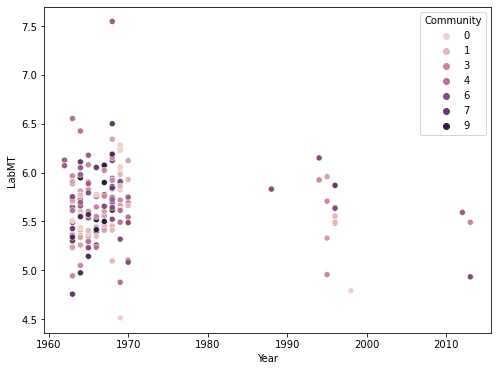

In [166]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=Lyrics_Data, x="Year", y="LabMT",hue="Community")
plt.show()

In [167]:
Song_data[-20:]

Song  Year     Month  Day Lyrics
281                                12-bar-original  1996     March   18     No
282                           if-youve-got-trouble  1996     March   18    Yes
283                                      means-lot  1996     March   18    Yes
284                                      beginning  1996   October   28     No
285                           all-things-must-pass  1996   October   28    Yes
286                                come-and-get-it  1996   October   28    Yes
287                                           junk  1996   October   28    Yes
288                 mailman-bring-me-no-more-blues  1996   October   28     No
289                                     not-guilty  1996   October   28    Yes
290  rip-it-shake-rattle-and-roll-blue-suede-shoes  1996   October   28     No
291                 step-inside-love-los-paranoias  1996   October   28    Yes
292                                      teddy-boy  1996   October   28    Yes
293                            whats-new-mary-jane  1996   October   28    Yes
294                        komm-gib-mir-deine-hand  1998     March    7    Yes
295                                       gnik-nus  2006  November   20     No
296                               you-know-what-do  2012  December   14    Yes
297                   you-never-give-me-your-money  2012  December   14    Yes
298                                 sie-liebt-dich  2013  February    7    Yes
299                                      slow-down  2013  February    7     No
300                                you-me-too-much  2013       May   16    Yes

###  <font color='darkblue'>Part 6: VADER Sentimental Analysis

Maybe an analysis with VADER makes more sense, due to the mood of the songs usually resides in how the sentence is written and not just in single words.

In [188]:
song=open('lyrics_songs/'+'got-get-you-my-life'+'.txt').read()
index=[(m.start(0), m.end(0)) for m in re.finditer('  ', song)]
sentences=[]
i=0
for el in index:
    sentences.append(song[i:el[0]])
    i=el[1]

In [184]:
song

"Don't let me down,  Don't let me down.  Don't let me down,  Don't let me down.   Nobody ever loved me like she does  Oo she does. Yes, she does.  And if somebody loved me like she do me,  Oo she do me. Yes, she does.   Don't let me down,  Don't let me down.  Don't let me down,  Don't let me down.   I'm in love for the first time.  Don't you know it's gonna last.  It's a love that lasts forever,  It's a love that had no past.   Don't let me down,  Don't let me down.  Don't let me down,  Don't let me down.   And from the first time that she really done  Me oo she done me, she done me good.  I guess nobody ever really done me,  Oo she done me, she done me good.   Don't let me down,  Don't let me down.  Don't let me down,  Don't let me down   "

In [183]:
sentences=[]
i=0
for el in index:
    sentences.append(song[i:el[0]])
    i=el[1]
sentences

["Don't let me down,  Don't let me down.  Don't ",
 "t me down,  Don't let me down.   Nobody ever",
 'oved me like she does  Oo ',
 'e does. Yes, she does.  And if somebody love',
 'me like she do me,  Oo she do me',
 "Yes, she does.   Don't let ",
 " down,  Don't let me down.  Don't let me down,  D",
 "'t let me down.   I'm in love for the first time",
 " Don't you know it's gonna last.  It's a love ",
 "at lasts forever,  It's a love ",
 "at had no past.   Don't le",
 "me down,  Don't let me down.  Don't let me down, ",
 "on't let me down.   And from the first time that",
 'he really done  Me oo she done me, she done me',
 'ood.  I guess nobody ever reall',
 'done me,  Oo she done me, s',
 ' done me good. ']

In [159]:
analyzer = SentimentIntensityAnalyzer()

def sentiment_score_VADER(sentence):
    sentiment_dict = analyzer.polarity_scores(sentence)
    return sentiment_dict['compound']

In [179]:
np.mean([sentiment_score_VADER(el) for el in sentences])

-0.0029294117647058896

In [171]:
for el in sentences:
    print(el)
    print(sentiment_score_VADER(el))

Yesterday, all my troubles seemed so far away,
-0.4588
Now it looks as though they're here to stay,
0.0
Oh, I believe in yesterday
0.0
 Suddenly, I'm not half the man I used to be
0.0
There's a shadow hanging over me
0.0
Oh, yesterday came suddenly
0.0
 Why she had to go I don't know, she wouldn't say
0.0
I said something wrong, now I long for yesterday
-0.4767
 Yesterday, love was such an easy game to play
0.8591
Now I need a place to hide away
-0.1779
Oh, I believe in yesterday
0.0
 Why she had to go I don't know, she wouldn't say
0.0
I said something wrong, now I long for yesterday
-0.4767
 Yesterday, love was such an easy game to play
0.8591
Now I need a place to hide away
-0.1779
Oh, I believe in yesterday,
0.0
Mm mm mm mm mm.
0.0


In [ ]:
wordsCount = {}
wordnet_lemmatizer = WordNetLemmatizer()

for name in dialogues:
    wordsCount[name] = Counter()
    for line in dialogues[name]:
        words = re.findall(r'\b\w+\b',line.lower())
        words = [wordnet_lemmatizer.lemmatize(word)for word in words]
        wordsCount[name].update(words)